# Lecture 6

## References

* Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2nd Edition), Robert Johansson.  
* Sample plots in Matplotlib  [link](https://matplotlib.org/tutorials/introductory/sample_plots.html)
* wikipedia

## This Lecture
*  Plotting and Visulization
*  introduction of matplotlib module


The **matplotlib** emerged as the most widely used plotting library for the Python programming language, and a core component of the scientific Python stack, along with **Numpy**, **Scipy** and **IPython**

**Notable usages**:
* data visualization during landing of the Phoenix spacecraft in 2008 (Mars lander) 
* the creation of the first image of a black hole


Comparison with MATLAB
==================

**Matplotlib.pyplot**  module  provides a MATLAB-like interface. Matplotlib is designed to be as usable as MATLAB, with the ability to use Python, and the advantage of being free and open-source.

## Line plot

create a line plot with text labels using plot():

how to plot $y=f(x)$

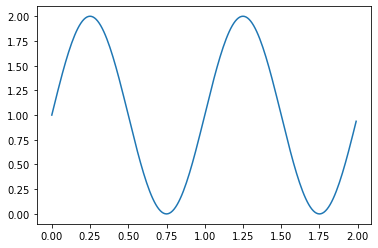

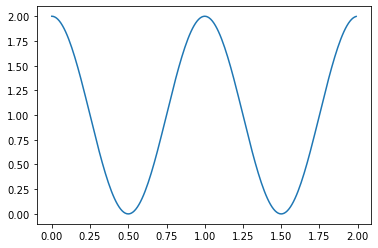

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

plt.figure(1)
plt.plot(t, s) #plot s=f(t)=1+sin(t)
#plt.grid()


fig=plt.figure(2)
c = 1 + np.cos(2 * np.pi * t) #plot c=g(t)=1+cos(t)
plt.plot(t, c)
#plt.grid()
fig.savefig("figrue2.png")
plt.show()


## Multiple subplots in one figure
Multiple axes (i.e. subplots) are created with the subplot() function:

$y_1=\cos(2\pi x_1)e^{-x_1}$

$y_2=\cos(2\pi x_2)$

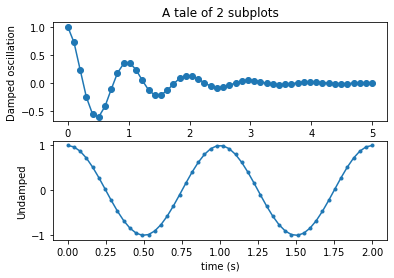

In [5]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1) # y1=cos(2pi*x1)*exp(-x1)
y2 = np.cos(2 * np.pi * x2) # y2=cos(2pi*x2)

plt.subplot(2, 1, 1)   # subplot(nrows, ncols, number)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

so far we have plotted $y=f(x)$

How to plot $z=f(x,y)$ ?

## pcolor, imshow, contour, contourf

example: plotting $z=f(x,y)=\sin(\pi x)\cos(\pi y)$

$z$ value is represented in color

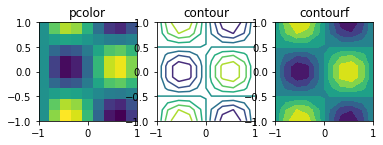

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-1.0,1.0,10)
y=x.copy()
X,Y=np.meshgrid(x,y)

Z=np.sin(np.pi*X)*np.cos(np.pi*Y)

plt.subplot(1,3,1, aspect='equal')
plt.pcolor(X,Y,Z)
plt.title('pcolor')

plt.subplot(1,3,2,aspect='equal')
plt.contour(X,Y,Z)
plt.title('contour')


plt.subplot(1,3,3, aspect='equal')
plt.contourf(X,Y,Z)
plt.title('contourf')


plt.show()


## Images
display images from data (assuming equally spaced horizontal dimensions) using the imshow() function.

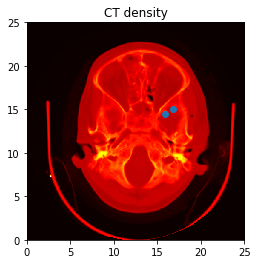

In [15]:
import matplotlib.cbook as cbook

w, h = 512, 512

with cbook.get_sample_data('ct.raw.gz') as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()

<font color='blue'>Image of Mandelbrot set</font>

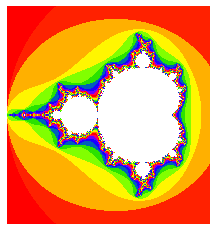

In [18]:
Z=np.load('mandel.npy')
plt.imshow(Z, cmap = plt.cm.prism, interpolation = 'none')
#savefig("mandelbrot_python.svg")
plt.axis('off')
plt.show()

## Histograms
The **hist()** function automatically generates histograms and returns the bin counts or probabilities:

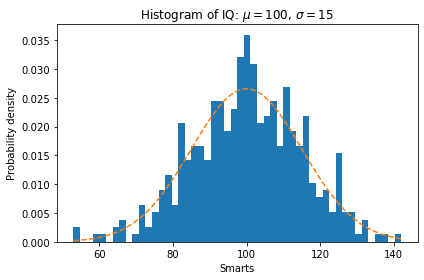

In [19]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## 3D surface (color map)


plotting: $z=f(x,y)=\sin(\sqrt{x^2+y^2})$

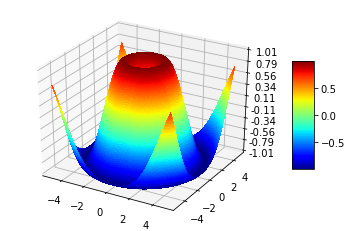

In [21]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,rstride=1, cstride=1,
                       linewidth=0, antialiased=False)


# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("test.png",dpi=300)
plt.show()

## A Fancy Example 

Interactive appliction

In [22]:
# an example of interactive applicaiton created using the IPython widget interact.

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def f(mu):
    X = stats.norm(loc=mu,scale=np.sqrt(mu))
    N = stats.poisson(mu)
    x = np.linspace(0,X.ppf(0.999))
    n = np.arange(0,x[-1])

    fig, ax=plt.subplots()
    ax.plot(x,X.pdf(x),color='black',lw=2,label="Normal ($\mu=%d, \sigma^2=%d$)" %(mu,mu))
    ax.bar(n,N.pmf(n),align='edge',label=r"Poisson($\lambda=%d$)" % mu)
    ax.set_ylim(0,X.pdf(x).max()*1.25)
    ax.legend(loc=2,ncol=2)
    plt.close(fig)
    return fig


from ipywidgets import interact
import ipywidgets as widgets
interact(f,mu=widgets.FloatSlider(min=1.0,max=20.0,step=1.0))



interactive(children=(FloatSlider(value=1.0, description='mu', max=20.0, min=1.0, step=1.0), Output()), _dom_c…

<function __main__.f(mu)>